In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [43]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

**1. Find the linear regression equation for this data.**

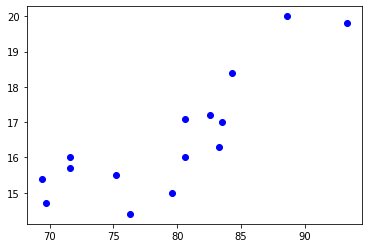

In [44]:
plt.scatter(df["Ground Temperature"], df["Chirps/Second"], c ="blue")
# To show the plot
plt.show()

In [45]:
reg = linear_model.LinearRegression()
# train the model using the training sets
x = df[["Ground Temperature"]]
y =  df["Chirps/Second"]
#x = np.array(x)
#y = np.array(y)
reg.fit(x,y)
# regression coefficients
print('intercept:', reg.intercept_)
print('Coefficients: ', reg.coef_)

intercept: 0.45931464523595267
Coefficients:  [0.20299973]


In [46]:
import statsmodels.api as sm

x = df[["Ground Temperature"]]
y =  df["Chirps/Second"]

#performing the regression
result = sm.OLS(x,y).fit()

# Result of statsmodels 
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:     Ground Temperature   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              4583.
Date:                Sat, 14 May 2022   Prob (F-statistic):                    5.09e-19
Time:                        13:20:26   Log-Likelihood:                         -43.490
No. Observations:                  15   AIC:                                      88.98
Df Residuals:                      14   BIC:                                      89.69
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

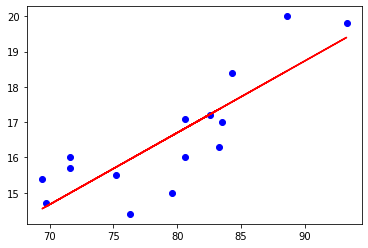

In [47]:
plt.scatter(x, y, color='blue')
plt.plot(x,reg.predict(x), color='red')

**2. Chart the original data and the equation on the chart**

In [48]:
# 𝑓(𝑥₁, 𝑥₂) = 𝑏₀ + 𝑏₁𝑥₁ + 𝑏₂𝑥₂ + 𝑏₃𝑥₁² + 𝑏₄𝑥₁𝑥₂ + 𝑏₅𝑥₂²
print(f"y = {reg.coef_[0]}*x + {reg.intercept_}")

y = 0.20299973140771363*x + 0.45931464523595267


**3. Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)**

In [49]:
print('r-squared: ',reg.score(x, y))

r-squared:  0.6922946529146998


**4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?**

In [50]:
x = [95]
x =np.array(x).reshape(-1,1)
pred = reg.predict(x)
print('At 95˚F, our approximation of chirps/sec is :',pred[0])

At 95˚F, our approximation of chirps/sec is : 19.74428912896875


**5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning?**

In [51]:
ret = (18 - reg.intercept_) / reg.coef_[0]
print(f'For observation of {18} chirps/sec,we expect a ground temp of {ret}˚F')

For observation of 18 chirps/sec,we expect a ground temp of 86.40743134548568˚F


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [52]:
df = pd.read_fwf("/content/brain_body.txt")

In [53]:
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [54]:
reg = linear_model.LinearRegression()
body_var = df[['Body']]
brain_var = df['Brain']
reg.fit(body_var, brain_var)

LinearRegression()

**1. Find the linear regression equation for this data for brain weight to body weight.**

In [55]:
print(f'Linear Regression Equation: f(x) = {reg.coef_[0]} * x + {reg.intercept_ }')

Linear Regression Equation: f(x) = 0.9029129477287057 * x + -56.85554542859637


**2. Chart the original data and the equation on the chart.**

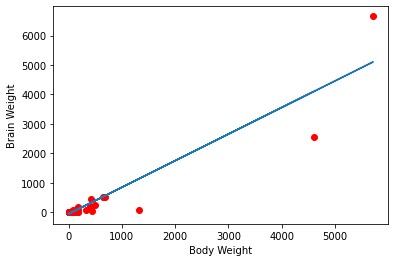

In [56]:
plt.scatter(body_var, brain_var, color='r')
pred = reg.predict(body_var)
plt.plot(body_var,pred)
plt.xlabel('Body Weight')
plt.ylabel('Brain Weight')
plt.show()

**3. Find the equation's  R2  score**

In [57]:
print('r-squared: ',reg.score(body_var,brain_var))

r-squared:  0.8726620843043331


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [58]:
df = pd.read_fwf("/content/salary.txt", header=None,names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [59]:
x = df.drop('Salary',axis=1)
y = df['Salary']
reg = linear_model.LinearRegression()
reg.fit(x,y)

LinearRegression()

**1. Find the linear regression equation for this data using columns 1-5 to column 6.**

In [60]:
reg.intercept_

11410.14654725559

In [61]:
reg.coef_

array([ 1241.7924996 ,  5586.18144952,   482.85976783, -1331.64406341,
        -128.79057354])

In [62]:
reg.score(x,y)

0.8547180674410969

**2. Find the selection of columns with the best  R2  score.**

In [63]:
from itertools import combinations

# all possible columns for X
cols = [x for x in df.columns if x != 'Salary']
# define Y as same accross the loops
Y = df['Salary']
# define result dictionary
fit_d = {}

# loop for any length of combinations
for i in range(1, len(cols)+1):
    # loop for any combinations with length i
    for comb in combinations(cols, i):
        # Define X from the combination
        X = df[list(comb)]
        X = sm.add_constant(X)
        # perform the OLS opertion
        model = sm.OLS(Y,X, missing = 'drop').fit()
        # save the rsquared in a dictionnary
        fit_d[comb] = model.rsquared

print(fit_d)
# extract the key for the max R value
key_max = max(fit_d, key=fit_d.get)

print(f'Best variables {key_max} for a R-value of {round(fit_d[key_max], 5)}')

{('Sex',): 0.06389892583288015, ('Rank',): 0.7525360539274631, ('Year',): 0.49093702676921624, ('Degree',): 0.004861680984748484, ('YSdeg',): 0.45542813458360276, ('Sex', 'Rank'): 0.7554917749443394, ('Sex', 'Year'): 0.4911360941886388, ('Sex', 'Degree'): 0.06643739842018892, ('Sex', 'YSdeg'): 0.49304792719667834, ('Rank', 'Year'): 0.8436480933264598, ('Rank', 'Degree'): 0.7557961688386643, ('Rank', 'YSdeg'): 0.7623948189698249, ('Year', 'Degree'): 0.4919014149016442, ('Year', 'YSdeg'): 0.5782019226431887, ('Degree', 'YSdeg'): 0.5409662288237875, ('Sex', 'Rank', 'Year'): 0.8454319861987165, ('Sex', 'Rank', 'Degree'): 0.7583144768153612, ('Sex', 'Rank', 'YSdeg'): 0.7666122610227071, ('Sex', 'Year', 'Degree'): 0.49207944757472966, ('Sex', 'Year', 'YSdeg'): 0.5808063918180406, ('Sex', 'Degree', 'YSdeg'): 0.5832708257660315, ('Rank', 'Year', 'Degree'): 0.8437395200874137, ('Rank', 'Year', 'YSdeg'): 0.8456725764485596, ('Rank', 'Degree', 'YSdeg'): 0.7625149185326454, ('Year', 'Degree', 'YSd

**3. Report whether sex is a factor in salary.**

Sex feature in the training data `does not have a significant influence`, its R2 Score alone in predicting target variable is `0.063898925832880038`, indicating that it has no direct influence on salary.